# Data Analysis & Visualization Project Plan

## 1. Project Goal
The goal of this project is to perform an Exploratory Data Analysis (EDA) on a dataset. We will load, clean, and explore the data to understand its basic characteristics. We will then answer specific analytical questions by creating a variety of visual plots using Matplotlib.

***

## 2. Project Workflow
Here is the step-by-step plan we will follow:

1.  **Load the Data**: Read the data from a CSV file using the **pandas** library.
2.  **Clean the Data**: Handle any missing values, remove duplicate entries, and fix column data types if needed.
3.  **Understand the Data**: Use pandas functions like `.head()`, `.info()`, and `.describe()` to get a high-level overview of the dataset.
4.  **Identify Questions**: Define the key questions we want to answer from the data.
5.  **Visualize the Data (EDA)**: Use **Matplotlib** to create charts that answer our questions visually.
6.  **Save the Plots**: Save the final visualizations as image files using `plt.savefig()` for use in reports or presentations.

***

## 3. Analysis Plan: Questions & Visualizations
This table outlines the specific questions we will investigate and the type of chart we will use for each.

| Question to Answer | Chart Type | Matplotlib Function |
| :--- | :--- | :--- |
| How many Movies vs TV Shows are there? | Bar Chart | `plt.bar()` |
| What is the percentage of each content rating? | Pie Chart | `plt.pie()` |
| How has the number of releases changed over the years?| Line Plot | `plt.plot()` |
| What is the distribution of movie durations? | Histogram | `plt.hist()` |
| What is the relationship between release year and shows?| Scatter Plot | `plt.scatter()` |
| What are the Top 10 countries with the most shows? | Horizontal Bar Chart | `plt.barh()` |
| How do different plots compare together? | Subplots | `plt.subplots()` |
| How do we save the final charts? | Saving Figures | `plt.savefig()` |

***

## 4. Key Libraries & Functions
This is a summary of the main tools we will use.

| Library / Function | Purpose |
| :--- | :--- |
| **pandas** | Data loading, cleaning, and exploration. |
| **matplotlib.pyplot** | Plotting all types of graphs. |
| `plt.plot()` | Line chart |
| `plt.bar()`, `plt.barh()` | Bar charts (vertical/horizontal) |
| `plt.pie()` | Pie chart |
| `plt.hist()` | Histogram (for distribution checks) |
| `plt.scatter()` | Scatter plot (for relationships) |
| `plt.subplots()` | Creating multiple plots in one figure. |
| `plt.tight_layout()`| Fixing overlapping labels and titles. |
| `plt.savefig()` | Saving charts as image files. |

https://www.kaggle.com/datasets/shivamb/netflix-shows

In [8]:
#Step -01 Importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt

#Loading the DataSet
df = pd.read_csv("netflix_titles.csv")
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

The dropna() function is used to remove missing values (often represented as NaN, None, or NaT) from a DataFrame.

You're using it as a crucial step in cleaning the data.

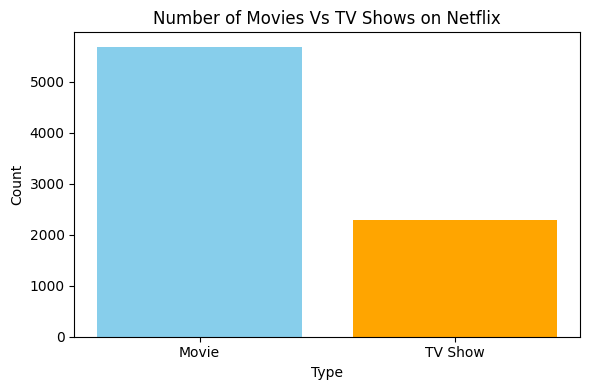

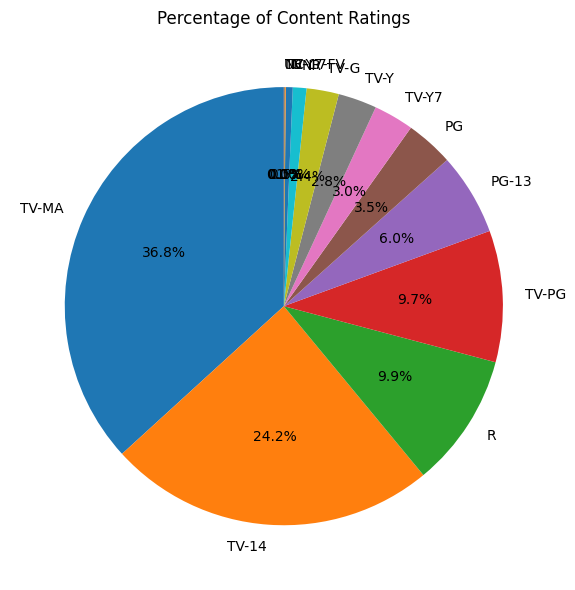

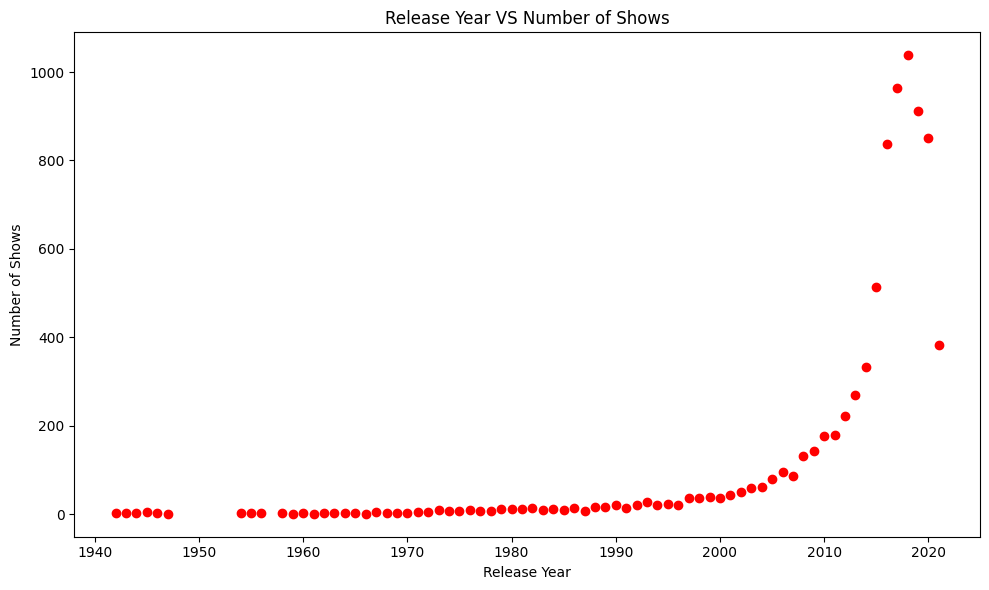

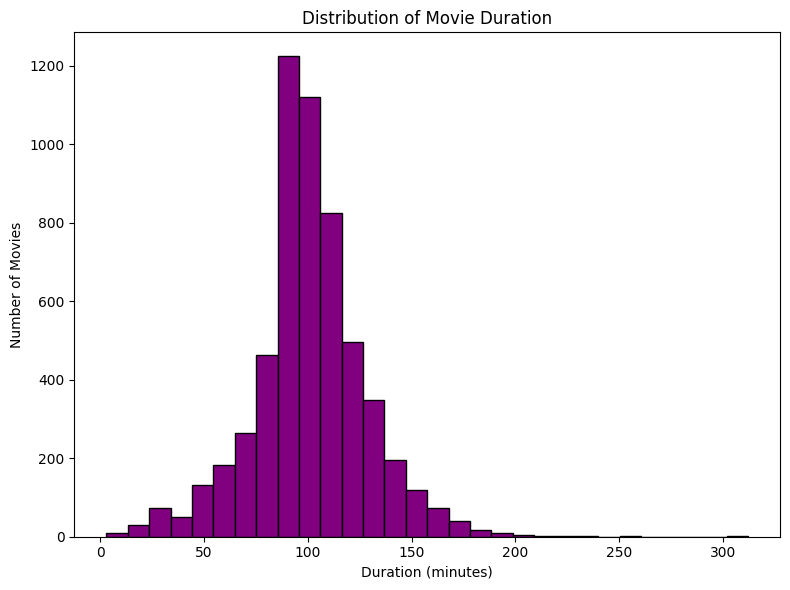

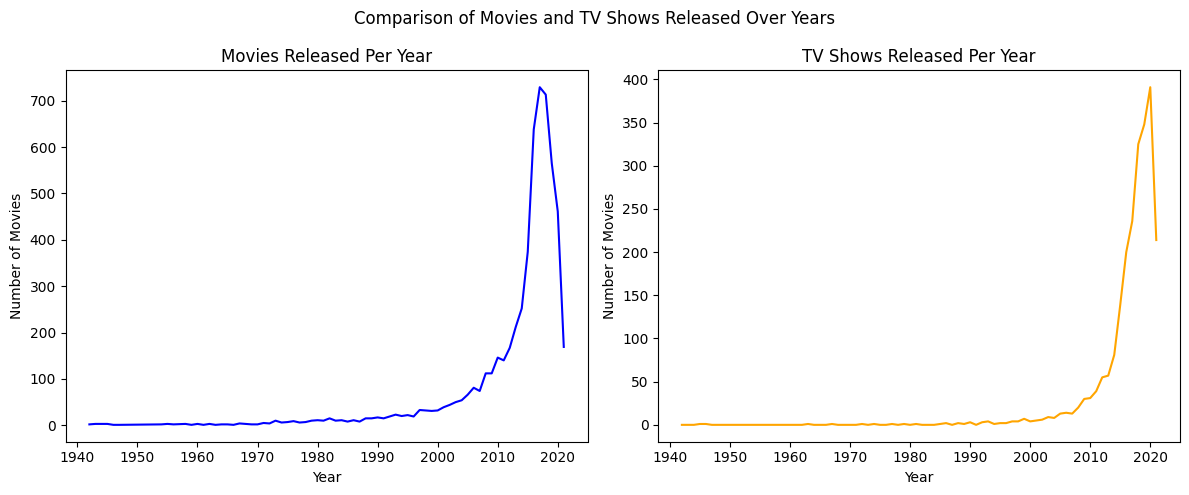

In [12]:
#Cleaning the data
df = df.dropna(subset = ['type', 'release_year','rating','country','duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color = ['skyblue','orange'])
plt.title("Number of Movies Vs TV Shows on Netflix")
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()

ratings_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(ratings_counts, labels= ratings_counts.index, autopct = '%1.1f%%', startangle=90)
plt.title("Percentage of Content Ratings")
plt.tight_layout()
plt.savefig("Content_ratings_pie.png")
plt.show()

release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

#first subplot:movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot:TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Movies')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()